 IMPLEMENTATION OF SGD FOR BOSTON DATASET 
 =================

In [0]:
!pip install -U -q Pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import sklearn
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler


In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
bos = pd.DataFrame(boston.data)
bos.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [0]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [6]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [7]:
boston.target[:5]


array([24. , 21.6, 34.7, 33.4, 36.2])

In [0]:

bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [0]:

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
#splitting data into train and test

SKLEARN'S SGD REGRESSOR IMPLEMENTATION
============

In [33]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(alpha=0.005,max_iter=100000,eta0=0.01,tol=0.005,random_state=2)
clf.fit(X_train, Y_train)


SGDRegressor(alpha=0.005, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=2, shuffle=True, tol=0.005, verbose=0,
       warm_start=False)

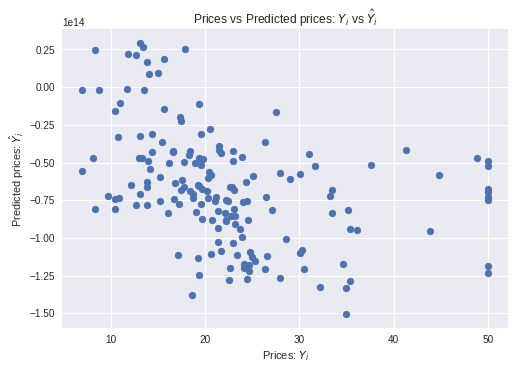

In [34]:
Y_pred = clf.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


In [35]:

print("R^2 score for SKLEARN'S SGD MODEL :", r2_score(Y_test, Y_pred))


R^2 score for SKLEARN'S SGD MODEL : -6.241464326312736e+25


SKLEARN'S LINEAR REGRESSION  MODEL
====

In [36]:
model1 =linear_model.LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

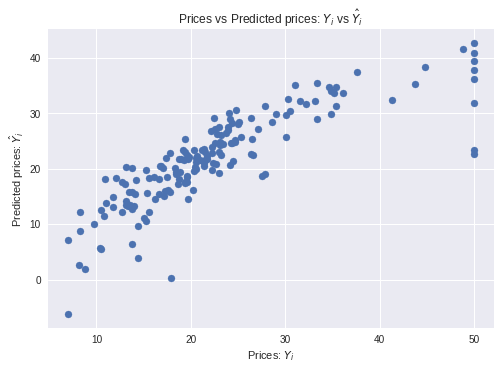

In [37]:
pred = model1.predict(X_test)
plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


In [38]:
print("R^2 score for SKLEARN'S LINEAR MODEL :", r2_score(Y_test,pred))


R^2 score for SKLEARN'S LINEAR MODEL : 0.6955388005506419


OUR IMPLEMENTATION OF SGD
=======

In [0]:
class SGD(BaseEstimator):
   
    def __init__(self,n_iter=100000,learning_rate=0.0001, tolerence=0.001, batch_size=20):
        self.n_iter = n_iter
        self.m = None 
        self.c = None
        self.learning_rate = learning_rate
        self.tolerence = tolerence
        self.batch_size = batch_size
        self.error_tot = []
        self.m_new = []
        self.c_new = []
      
    def predict(self, X):
        return X.dot(self.m) + self.c  
      #predicting optimal line
    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)        
        rows, columns = X.shape
        self.m = np.zeros(columns)
        self.c= 0.0        
        self.optimize(X, Y)
        return self   
    def batch(self, X, Y):
      #sampling into batches
        val= np.random.randint(X.shape[0], size=self.batch_size)
        return X[val,:], Y[val]                             
    def compute_error(self, X, Y):
      #computing error
        return  np.sum((Y - self.predict(X))**2) /len(X)
    def optimize(self, X, Y):
      #optimising parameters
        for i in range(1, self.n_iter + 1):            
            self.error_tot.append(self.compute_error(X, Y))           
            prev_m = self.m
            prev_c = self.c
            X_mini, Y_mini = self.batch(X, Y)
            pred = self.predict(X_mini)
            error = Y_mini- pred                    
            m_gradient = -2 * np.dot(X_mini.T, error)
            c_gradient = -2 * np.sum(error)            
            self.m = self.m - (self.learning_rate/i ) * m_gradient
            self.c= self.c- (self.learning_rate/i) * c_gradient            
            coef_m = np.linalg.norm(self.m - prev_m)
            coef_c = self.c - prev_c            
            self.m_new.append(coef_m)
            self.c_new.append(coef_c)
            
            if coef_m < self.tolerence:
               if coef_c < self.tolerence:
                    self.error_tot.append(self.compute_error(X, Y))
                    break

Hyper-parameter tuning for best learningrate and batchsize
-------

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [207]:
lr= (0.1,0.05,0.001,0.005,0.04,0.3,1)
b_size=(10,20,30,40)
hyperparameters = dict(learning_rate=lr,batch_size=b_size)
model = GridSearchCV(SGD(),hyperparameters, scoring = 'r2', cv=3)# using grid search cv with 3 fold cross validation
model.fit(X_scaled, Y_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:676: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=3, error_score='raise',
       estimator=SGD(batch_size=20, learning_rate=0.0001, n_iter=100000, tolerence=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': (0.1, 0.05, 0.001, 0.005, 0.04, 0.3, 1), 'batch_size': (10, 20, 30, 40)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [153]:
print('Best estimator:',model.best_estimator_)#obtaining best estimator

Best estimator: SGD(batch_size=10, learning_rate=0.05, n_iter=100000, tolerence=0.001)


Observation:
--------
1.  Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data.
 
2.   For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1.

3.  Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler:



In [208]:
cl= SGD(batch_size=10, learning_rate=0.05, n_iter=100000, tolerence=0.001)
cl.fit(X_scaled,Y_train)

SGD(batch_size=10, learning_rate=0.05, n_iter=100000, tolerence=0.001)

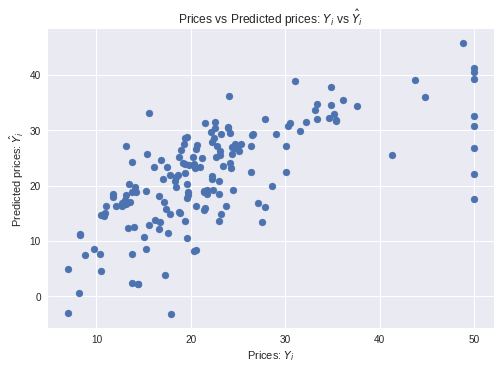

In [209]:
X_test_scaled = scaler.transform(X_test)
y_pred = cl.predict(X_test_scaled)

plt.scatter(Y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

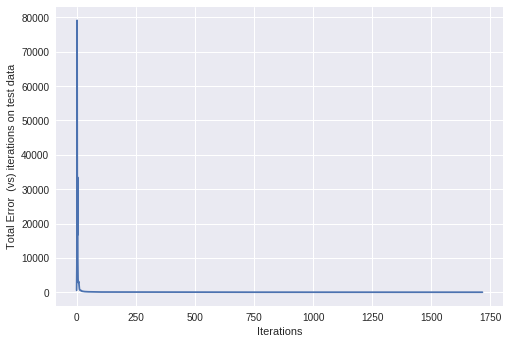

In [210]:
Q=plt.plot(cl.error_tot)
plt.xlabel('Iterations')
plt.ylabel('Total Error  (vs) iterations on test data');

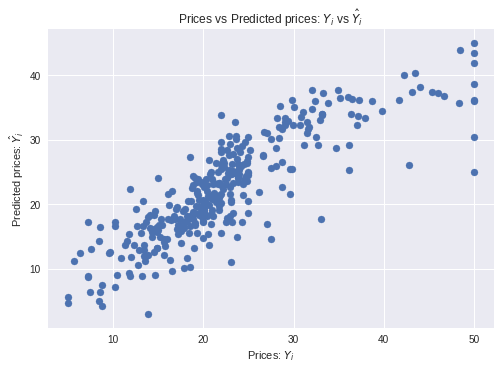

In [214]:
cl1= SGD(batch_size=10, learning_rate=0.05, n_iter=100000, tolerence=0.001)
cl1.fit(X_scaled,Y_train)
predict = cl1.predict(X_scaled)

plt.scatter(Y_train,predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

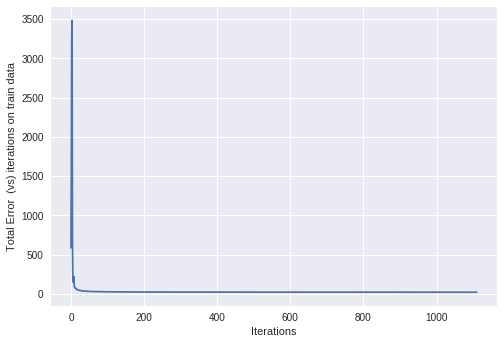

In [216]:
Q=plt.plot(cl1.error_tot)
plt.xlabel('Iterations')
plt.ylabel('Total Error  (vs) iterations on train data');

In [217]:
rms_error=np.sqrt(np.sum((Y_train-cl1.predict(X_scaled)) ** 2) / len(X_scaled))
print('RMS ERROR ON OUR MODEL on traindata:',rms_error)

RMS ERROR ON OUR MODEL on traindata: 4.70508377823611


In [178]:
rms_error=np.sqrt(np.sum((Y_test-cl.predict(X_test_scaled)) ** 2) / len(X_test_scaled))
print('RMS ERROR ON OUR MODEL:',rms_error)

RMS ERROR ON OUR MODEL: 5.196652645602167


In [179]:
rms_error1=np.sqrt(np.sum((Y_test-model1.predict(X_test)) ** 2) / len(X_test))
print("RMS ERROR ON SKLEARN's LINEAR MODEL:",rms_error1)

RMS ERROR ON SKLEARN's LINEAR MODEL: 5.342412121468939


The RMS ERROR OF OUR MODEL AND SKLEARN'S MODEL ARE ALMOST CLOSE
------

In [180]:

print("R^2 score for our model :", r2_score(Y_test, y_pred))


R^2 score for our model : 0.7119256721666534


In [222]:
print("R^2 score for our model on train data :", r2_score(Y_train,predict))


R^2 score for our model on train data : 0.7226745354368981


In [225]:
print("R^2 score for sklearns linearmodel:", r2_score(Y_test,pred))


R^2 score for sklearns linearmodel: 0.6955388005506419


In [181]:
len(model.best_estimator_.error_tot)


8270


we clearly observe that as the number of iterations increases the error is decreased
---------

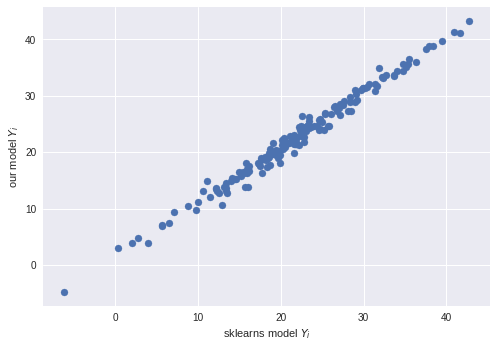

In [194]:
r=plt.scatter(pred, y_pred)
plt.xlabel('sklearns model $Y_i$')
plt.ylabel('our model $Y_i$');

Here we can clearly observe that our model's  prediction of $Y_i$ and sklearn's model when plotted forms straightline.
--------

In [218]:
pd.DataFrame(list(zip(X.columns,cl1.m_new,cl.m_new,clf.coef_,model1.coef_)),columns=['features',
 'coefficients_ourmodel_traindata','coefficients_ourmodel_testdata','Coefficients_sklearn sgd',
                                                                                     'coefficients of linear regression'])


,features,coefficients_ourmodel_traindata,coefficients_ourmodel_testdata,Coefficients_sklearn sgd,coefficients of linear regression
0,CRIM,22.454088,44.950560,-4.777185e+11,-0.156381
1,ZN,41.063019,156.537699,-2.601539e+11,0.038549
2,INDUS,47.912267,160.880940,6.833706e+10,-0.025063
3,CHAS,34.724931,121.365365,-1.454218e+10,0.786440
4,NOX,7.880395,48.092421,-2.196768e+09,-12.946912
5,RM,2.192674,25.096707,-1.532334e+11,4.002689
6,AGE,1.465921,12.724155,9.027845e+11,-0.011602
7,DIS,8.338608,2.576553,-5.093802e+10,-1.368288
8,RAD,3.746239,5.389031,9.944776e+09,0.341757
9,TAX,1.903799,33.048603,-8.306910e+10,-0.013515



observation
--------

1. RMS ERROR ON OUR MODEL TESTDATA= 5.19

2.  RMS ERROR ON SKLEARN's LINEAR MODEL: 5.34

3.   RMS ERROR ON OUR MODEL ON TRAINDATA: 4.70508377823611

-------------------------------------------------------------------------------------------------




1.   R^2 score for our model on train data : 0.7226745354368981
2.  R^2 score for our model on test data =0.71
1.    R^2 score for our model on sklearn's linearmodel=0.69







By looking into cost plot and R^2 score  of test data  and traindata it seems my model is overfitting.
--------